In [1]:
%load_ext watermark
%watermark -a 'Christian Schuhegger' -u -d -v -p numpy,xarray,scipy,pandas,matplotlib,seaborn,qgrid,rpy2,libpgm,pgmpy,networkx,graphviz,pybnl,pytest

Christian Schuhegger 
last updated: 2018-06-12 

CPython 3.6.4
IPython 6.2.1

numpy 1.14.2
xarray 0.10.3
scipy 1.0.1
pandas 0.22.0
matplotlib 2.2.2
seaborn 0.8.1
qgrid 1.0.2
rpy2 2.9.1
libpgm n
pgmpy n
networkx 2.1
graphviz 0.8.3
pybnl n
pytest 3.5.0


In [2]:
%matplotlib inline
import numpy as np, pandas as pd, xarray as xr, matplotlib.pyplot as plt, seaborn as sns
import networkx as nx, graphviz, networkx.algorithms.dag

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
np.set_printoptions(edgeitems=10)
np.set_printoptions(suppress=True)
np.core.arrayprint._line_width = 180

sns.set()

In [3]:
from IPython.display import display, HTML

from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        if type(df) == np.ndarray:
            df = pd.DataFrame(df)
        html_str+=df.to_html()
    html_str = html_str.replace('table','table style="display:inline"')
    # print(html_str)
    display_html(html_str,raw=True)

CSS = """
.output {
    flex-direction: row;
}
"""

display(HTML("<style>.container { width:70% !important; }</style>"))

In [4]:
%load_ext rpy2.ipython

/media/disk2/home/cs/local/install/Anaconda3-5.1.0-Linux-x86_64/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Warning messages:

  warnings.warn(x, RRuntimeWarning)
/media/disk2/home/cs/local/install/Anaconda3-5.1.0-Linux-x86_64/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 1: 
  warnings.warn(x, RRuntimeWarning)
/media/disk2/home/cs/local/install/Anaconda3-5.1.0-Linux-x86_64/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: In value[[3L]](cond) :
  warnings.warn(x, RRuntimeWarning)
/media/disk2/home/cs/local/install/Anaconda3-5.1.0-Linux-x86_64/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 
 
  warnings.warn(x, RRuntimeWarning)
/media/disk2/home/cs/local/install/Anaconda3-5.1.0-Linux-x86_64/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning:  "getThreads" not available for .C() for package "RevoUtilsMath"

  warnings.warn(x, RRuntimeWarn

* [Making packages in R using devtools](https://uoftcoders.github.io/studyGroup/lessons/r/packages/lesson/)
    * `R CMD build bnlearn`
* [Using devtools for Lazy People](http://rstudio-pubs-static.s3.amazonaws.com/2556_4e9f1c2af93b4683a19e2303a52bb2d5.html)
* [Building and installing an R package](http://kbroman.org/pkg_primer/pages/build.html)
* [devtools](https://www.rstudio.com/products/rpackages/devtools/)
    * [github](https://github.com/r-lib/devtools)
* [Can the code of a R package be changed? How?](https://www.biostars.org/p/146490/)
    * `dev_mode`, `install_local`
    * [load_all](https://rdrr.io/cran/devtools/man/load_all.html)
    * `remove.packages("bnlearn")`

In [5]:
%%R
ip <- as.data.frame(installed.packages()[,c(1,3:4)])
rownames(ip) <- NULL
ip <- ip[is.na(ip$Priority),1:2,drop=FALSE]
#print(ip, row.names=FALSE)

In [6]:
# /home/cs/local/install/Anaconda3-5.1.0-Linux-x86_64/lib/R/library/bnlearn
# %%R
# library("devtools")
# getwd()
# getLoadedDLLs()
# dyn.load("bnlearn/src/bnlearn.so")
# library.dynam("bnlearn", package = c("bnlearn_4.3"), lib.loc = c("bnlearn/src"))
# sessionInfo()
# devtools::build("/home/cs/workspaces/bnlearn/")

In [7]:
# %%R
# #devtools::install_local("../../bnlearn")
# load_all("/home/cs/workspaces/bnlearn/")

In [8]:
%load_ext autoreload
%autoreload 1
%aimport pybnl.bn

In [9]:
import locale
locale.setlocale(locale.LC_ALL, 'C')

import rpy2, rpy2.rinterface, rpy2.robjects, rpy2.robjects.packages, rpy2.robjects.lib, rpy2.robjects.lib.grid, \
    rpy2.robjects.lib.ggplot2, rpy2.robjects.pandas2ri, rpy2.interactive.process_revents, \
    rpy2.interactive, rpy2.robjects.lib.grdevices
# rpy2.interactive.process_revents.start()
rpy2.robjects.pandas2ri.activate()

In [10]:
%%R -o marks
library(bnlearn)
data(marks)

In [11]:
marks.head()

,MECH,VECT,ALG,ANL,STAT
1,77.0,82.0,67.0,67.0,81.0
2,63.0,78.0,80.0,70.0,81.0
3,75.0,73.0,71.0,66.0,81.0
4,55.0,72.0,63.0,70.0,68.0
5,63.0,63.0,65.0,70.0,63.0


* [networkx](https://github.com/networkx/networkx)
* [tutorial](https://networkx.github.io/documentation/stable/tutorial.html)
* [graphviz](https://github.com/xflr6/graphviz)
* [graphviz.readthedocs](https://graphviz.readthedocs.io/en/stable/)
* [examples/notebook.ipynb](https://github.com/xflr6/graphviz/blob/master/examples/notebook.ipynb)

In [12]:
dg = nx.DiGraph()
# G.add_node(1)
dg.add_nodes_from(list(marks.columns))
dg.add_edges_from([
    ['STAT', 'ANL'],
    ['STAT', 'ALG'],
    ['ANL', 'ALG'],
    ['ALG', 'MECH'],
    ['ALG', 'VECT'],
    ['VECT', 'MECH'],
])

In [13]:
list(nx.connected_components(dg.to_undirected()))

[{'ALG', 'ANL', 'MECH', 'STAT', 'VECT'}]

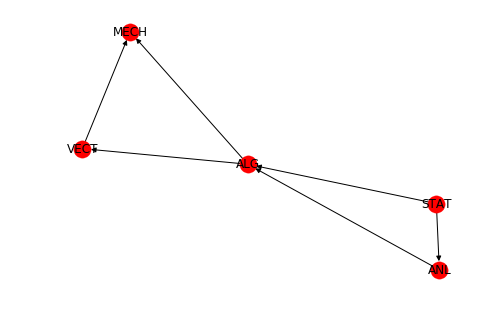

In [14]:
nx.draw(dg, with_labels=True)

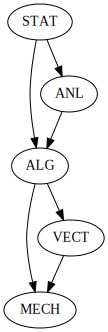

In [15]:
dg_dot = graphviz.Digraph(comment='disease-network')
for node in dg.nodes():
    dg_dot.node(node)

for edge in dg.edges():
    dg_dot.edge(edge[0],edge[1])

dg_dot

In [16]:
list(networkx.algorithms.dag.topological_sort(dg))

['STAT', 'ANL', 'ALG', 'VECT', 'MECH']

In [17]:
list(dg.nodes()),list(dg.edges())

(['MECH', 'VECT', 'ALG', 'ANL', 'STAT'],
 [('VECT', 'MECH'),
  ('ALG', 'MECH'),
  ('ALG', 'VECT'),
  ('ANL', 'ALG'),
  ('STAT', 'ANL'),
  ('STAT', 'ALG')])

In [18]:
nds = rpy2.robjects.StrVector(list(dg.nodes()))

In [19]:
connectivity_matrix = xr.DataArray(np.zeros((len(marks.columns), len(marks.columns))), 
             dims = ['from','to'], 
             coords= {'from': list(marks.columns), 'to': list(marks.columns)})
for edge in dg.edges():
    connectivity_matrix.loc[{'from': edge[0], 'to': edge[1]}] = 1
np_connectivity_matrix = np.array(connectivity_matrix.values)
np_connectivity_matrix

array([[0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 1., 0.]])

In [20]:
%%R -i np_connectivity_matrix -i nds
dag = empty.graph(nds)
amat(dag) = np_connectivity_matrix
dag


  Random/Generated Bayesian network

  model:
   [STAT][ANL|STAT][ALG|ANL:STAT][VECT|ALG][MECH|VECT:ALG] 
  nodes:                                 5 
  arcs:                                  6 
    undirected arcs:                     0 
    directed arcs:                       6 
  average markov blanket size:           2.40 
  average neighbourhood size:            2.40 
  average branching factor:              1.20 

  generation algorithm:                  Empty 



In [21]:
%%R
moral(dag)


  Random/Generated Bayesian network

  model:
    [undirected graph]
  nodes:                                 5 
  arcs:                                  6 
    undirected arcs:                     6 
    directed arcs:                       0 
  average markov blanket size:           2.40 
  average neighbourhood size:            2.40 
  average branching factor:              0.00 

  generation algorithm:                  Empty 



In [22]:
%%R
node.ordering(dag)

[1] "STAT" "ANL"  "ALG"  "VECT" "MECH"


In [23]:
%%R
nbr(dag, "ANL")

[1] "ALG"  "STAT"


In [24]:
%%R
mb(dag, "ANL")

[1] "ALG"  "STAT"


In [25]:
%%R
score(dag,data=marks,type="loglik-g")

[1] -1695.589


In [26]:
%%R
vstructs(dag)

     X      Z      Y     
[1,] "VECT" "MECH" "ALG" 
[2,] "ANL"  "ALG"  "STAT"


In [27]:
%%R
vstructs(dag, moral=TRUE)

     X      Z      Y     
[1,] "VECT" "MECH" "ALG" 
[2,] "ANL"  "ALG"  "STAT"


In [28]:
%%R
cpdag(dag)


  Random/Generated Bayesian network

  model:
    [undirected graph]
  nodes:                                 5 
  arcs:                                  6 
    undirected arcs:                     6 
    directed arcs:                       0 
  average markov blanket size:           2.40 
  average neighbourhood size:            2.40 
  average branching factor:              0.00 

  generation algorithm:                  Empty 



[Principled Computational Methods for the Validation and Discovery of Genetic Regulatory Networks](http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.4.6170) by Alexander John Hartemink, 2001

In [29]:
%%R -o dmarks1 -o dmarks2
dmarks1 = discretize(marks, breaks=3, method="interval")
dmarks2 = discretize(marks, breaks=3, method="hartemink", ibreaks=5, idisc="quantile")

In [30]:
%%R
levels(dmarks1$MECH)

[1] "[-0.077,25.7]" "(25.7,51.3]"   "(51.3,77.1]"  


In [31]:
%%R
levels(dmarks2$MECH)

[1] "[0,22.4]"  "(22.4,46]" "(46,77]"  


In [32]:
display_side_by_side(dmarks1.head(), dmarks2.head())

,MECH,VECT,ALG,ANL,STAT
1,"(51.3,77.1]","(57.7,82.1]","(58.3,80.1]","(49.7,70.1]","(57,81.1]"
2,"(51.3,77.1]","(57.7,82.1]","(58.3,80.1]","(49.7,70.1]","(57,81.1]"
3,"(51.3,77.1]","(57.7,82.1]","(58.3,80.1]","(49.7,70.1]","(57,81.1]"
4,"(51.3,77.1]","(57.7,82.1]","(58.3,80.1]","(49.7,70.1]","(57,81.1]"
5,"(51.3,77.1]","(57.7,82.1]","(58.3,80.1]","(49.7,70.1]","(57,81.1]"
,MECH,VECT,ALG,ANL,STAT
1,"(46,77]","(61,82]","(59.6,80]","(60.2,70]","(44,81]"
2,"(46,77]","(61,82]","(59.6,80]","(60.2,70]","(44,81]"
3,"(46,77]","(61,82]","(59.6,80]","(60.2,70]","(44,81]"
4,"(46,77]","(61,82]","(59.6,80]","(60.2,70]","(44,81]"


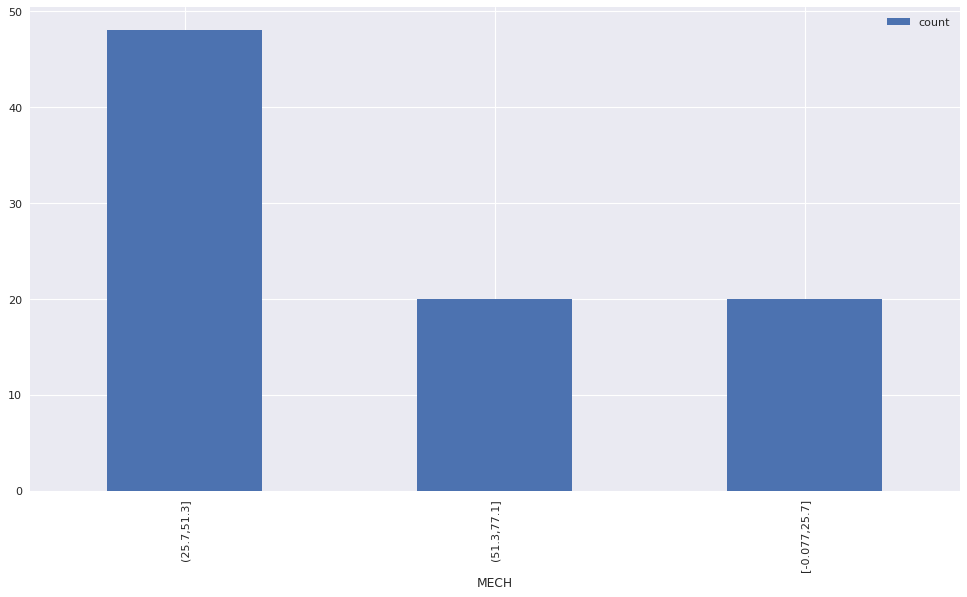

In [33]:
fig=plt.figure(figsize=(15, 8), dpi= 80, facecolor='w', edgecolor='k')
ax  = plt.subplot(1,1,1)
dmarks1['MECH'].groupby(dmarks1['MECH']).agg(['count']).plot.bar(ax=ax);

In [34]:
import dsbasics.bin

Text(0.5,0,'MECH')

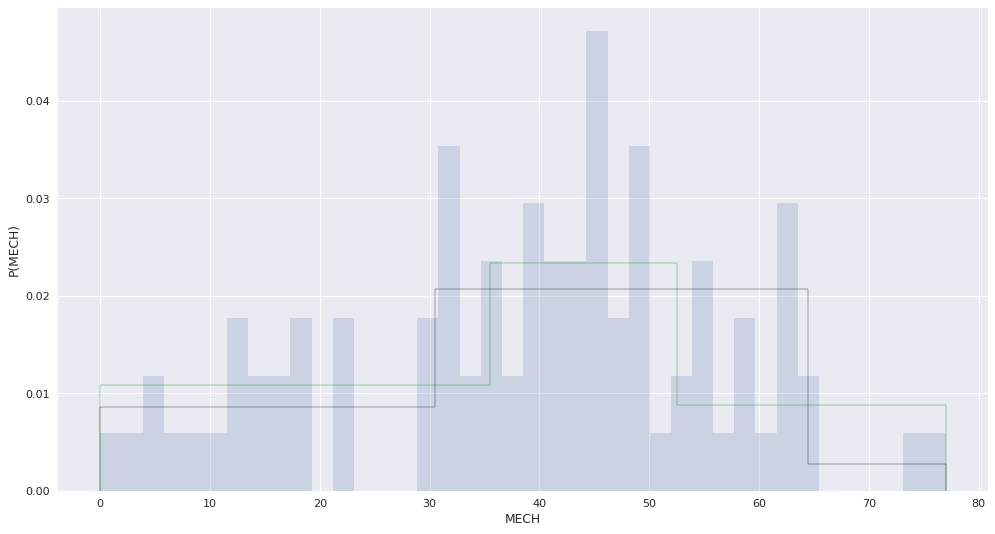

In [35]:
x = marks['MECH'].values
X = x.reshape(-1,1)

bbt1 = dsbasics.bin.BayesianBlocksBinTransformer(p0=0.05)
bbt1.fit(X)

bbt2 = dsbasics.bin.DecisionTreeBinTransformer(max_leaf_nodes=3)
bbt2.fit(X)


fig=plt.figure(figsize=(15, 8), dpi= 80, facecolor='w', edgecolor='k')
ax  = plt.subplot(1,1,1)

ax.hist(x,bins=40, histtype='stepfilled', alpha=0.2, density=True)
ax.hist(x, bins=bbt1.bins_[0], histtype='step', color='black', density=True)
ax.hist(x, bins=bbt2.bins_[0], histtype='step', color='green', density=True)
ax.set_ylabel('P(MECH)')
# ax.set_xlim(0.0,400.0)
ax.set_xlabel('MECH')

In [36]:
x = dmarks1['MECH']
c = pd.Categorical(x)
c.categories

Index(['(25.7,51.3]', '(51.3,77.1]', '[-0.077,25.7]'], dtype='object')

In [37]:
%%R
write.csv(marks, file = "marks.csv")
head(marks)

  MECH VECT ALG ANL STAT
1   77   82  67  67   81
2   63   78  80  70   81
3   75   73  71  66   81
4   55   72  63  70   68
5   63   63  65  70   63
6   53   61  72  64   73


In [38]:
pd_marks = pd.read_csv('marks.csv', index_col=0).astype(np.float64)
pd_marks.head()

,MECH,VECT,ALG,ANL,STAT
1,77.0,82.0,67.0,67.0,81.0
2,63.0,78.0,80.0,70.0,81.0
3,75.0,73.0,71.0,66.0,81.0
4,55.0,72.0,63.0,70.0,68.0
5,63.0,63.0,65.0,70.0,63.0


In [39]:
# %%R -i pd_marks
# dmarks2_ = discretize(pd_marks, breaks=3, method="hartemink", ibreaks=5, idisc="quantile")
# head(dmarks2_)

In [40]:
df = pybnl.bn.discretize(pd_marks)
df.head()

(0, 'MECH')
[1] "[0,22.4]"  "(22.4,46]" "(46,77]"  

(1, 'VECT')
[1] "[9,40]"  "(40,61]" "(61,82]"

(2, 'ALG')
[1] "[15,43]"   "(43,59.6]" "(59.6,80]"

(3, 'ANL')
[1] "(9,47]"    "(47,60.2]" "(60.2,70]"

(4, 'STAT')
[1] "[9,29.4]"  "(29.4,44]" "(44,81]"  



,MECH,VECT,ALG,ANL,STAT
1,"(46,77]","(61,82]","(59.6,80]","(60.2,70]","(44,81]"
2,"(46,77]","(61,82]","(59.6,80]","(60.2,70]","(44,81]"
3,"(46,77]","(61,82]","(59.6,80]","(60.2,70]","(44,81]"
4,"(46,77]","(61,82]","(59.6,80]","(60.2,70]","(44,81]"
5,"(46,77]","(61,82]","(59.6,80]","(60.2,70]","(44,81]"


In [41]:
df.dtypes

MECH    category
VECT    category
ALG     category
ANL     category
STAT    category
dtype: object

In [42]:
df['MECH'].cat.categories

Index(['[0,22.4]', '(22.4,46]', '(46,77]'], dtype='object')

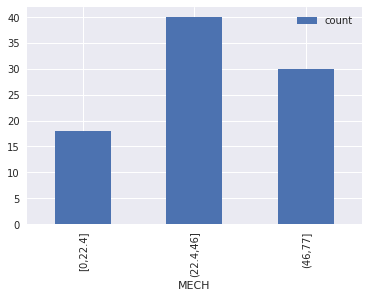

In [43]:
df['MECH'].groupby(df['MECH']).agg(['count']).plot.bar()

In [44]:
df['MECH'].head()

1    (46,77]
2    (46,77]
3    (46,77]
4    (46,77]
5    (46,77]
Name: MECH, dtype: category
Categories (3, object): [[0,22.4] < (22.4,46] < (46,77]]

In [45]:
bn = pybnl.bn.NetAndDataDiscreteBayesNetwork(dg, df)

In [46]:
bn.model_string

'[STAT][ANL|STAT][ALG|STAT:ANL][VECT|ALG][MECH|ALG:VECT]'

In [47]:
print(bn.rnet)


  Random/Generated Bayesian network

  model:
   [STAT][ANL|STAT][ALG|ANL:STAT][VECT|ALG][MECH|ALG:VECT] 
  nodes:                                 5 
  arcs:                                  6 
    undirected arcs:                     0 
    directed arcs:                       6 
  average markov blanket size:           2.40 
  average neighbourhood size:            2.40 
  average branching factor:              1.20 

  generation algorithm:                  Empty 




In [48]:
print(bn.rfit)


  Bayesian network parameters

  Parameters of node ALG (ordinal distribution)

Conditional probability table:
 
, , STAT = [9,29.4]

           ANL
ALG             (9,47]  (47,60.2] (60.2,70]
  [15,43]   0.66666667 0.33333333          
  (43,59.6] 0.33333333 0.66666667          
  (59.6,80] 0.00000000 0.00000000          

, , STAT = (29.4,44]

           ANL
ALG             (9,47]  (47,60.2]  (60.2,70]
  [15,43]   0.35294118 0.05882353 0.00000000
  (43,59.6] 0.64705882 0.88235294 1.00000000
  (59.6,80] 0.00000000 0.05882353 0.00000000

, , STAT = (44,81]

           ANL
ALG             (9,47]  (47,60.2]  (60.2,70]
  [15,43]   0.14285714 0.09090909 0.00000000
  (43,59.6] 0.85714286 0.45454545 0.25000000
  (59.6,80] 0.00000000 0.45454545 0.75000000


  Parameters of node ANL (ordinal distribution)

Conditional probability table:
 
           STAT
ANL           [9,29.4]  (29.4,44]    (44,81]
  (9,47]    0.83333333 0.47222222 0.20588235
  (47,60.2] 0.16666667 0.47222222 0.32352941
  (60

In [49]:
print(bn.grain)

Independence network: Compiled: TRUE Propagated: FALSE 
  Nodes: chr [1:5] "ALG" "ANL" "MECH" "STAT" "VECT"



In [50]:
df['STAT'].cat.categories[0]

'[9,29.4]'

In [51]:
evidence = dict(ALG=df['ALG'].cat.categories[0])
nodes_to_query = ['STAT']
bn.exact_query(evidence, nodes_to_query, only_python_result=True)

{'STAT': {'(29.4,44]': 0.35, '(44,81]': 0.09999999999999998, '[9,29.4]': 0.55}}

In [52]:
bn.write_net('marks.net')

In [53]:
# TODO
# Convert network from R to python xarray and pandas and allow for save and load
# Implement structure learning
# Ask question about discretization score available in bnlearn discretize?
# Plot discretization levels
# Implement error checking
#  Ensure that queries only use valid variables and values for these variables
# Implement unit tests
# Implement approximate queries
# Implement model averaging, cross validation, ...
# Implement ames house price example
#  Arc strengths
# Implement own problem with LLT dependencies
# Plot graphs as equivalence structures (cpdag) and use cextend for consistent extension
# Implement sampling from a network

In [54]:
rfit = bn.rfit

In [55]:
%%R -i rfit
# nodes(rfit)
# colnames, rownames, dimnames
# dimnames(rfit$STAT$prob)[1]
# dimnames(rfit$ANL$prob)[1]
dimnames(rfit$ANL$prob)

$ANL
[1] "(9,47]"    "(47,60.2]" "(60.2,70]"

$STAT
[1] "[9,29.4]"  "(29.4,44]" "(44,81]"  



In [56]:
%%R -o anl_prob
anl_prob = rfit$ANL$prob

In [57]:
rfit.rx('ANL')

R object with classes: ('list',) mapped to:
<ListVector - Python:0x7fdd5e6ee888 / R:0x7fddcd50f0b8>
[ListVector]
R object with classes: ('list',) mapped to:
<ListVector - Python:0x7fdd5e6ee888 / R:0x7fddcd50f0b8>
[ListVector]

In [58]:
rpy2.robjects.pandas2ri.ri2py(anl_prob)

array([[0.83333333, 0.47222222, 0.20588235],
       [0.16666667, 0.47222222, 0.32352941],
       [0.        , 0.05555556, 0.47058824]])

In [59]:
anl_prob

0.833333,0.166667,0.000000,0.472222,...,0.055556,0.205882,0.323529,0.470588


In [60]:
anl_prob.names.rx('ANL').names[0]

'ANL'

In [61]:
anl_prob.names

R object with classes: ('list',) mapped to:
<ListVector - Python:0x7fdd5ee43348 / R:0x7fddcbe1aac0>
[StrVector, StrVector]
  ANL: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x7fdd5e783c48 / R:0x7fddcc338010>
['(9,47]', '(47,60.2]', '(60.2,70]']
  STAT: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x7fdd5e6f3ac8 / R:0x7fddce07d560>
['[9,29.4]', '(29.4,44]', '(44,81]']

In [62]:
anl_prob.names

R object with classes: ('list',) mapped to:
<ListVector - Python:0x7fdd5e6f3148 / R:0x7fddcbe1aac0>
[StrVector, StrVector]
  ANL: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x7fdd5e6df808 / R:0x7fddcc338010>
['(9,47]', '(47,60.2]', '(60.2,70]']
  STAT: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x7fdd5e6f3cc8 / R:0x7fddce07d560>
['[9,29.4]', '(29.4,44]', '(44,81]']

In [63]:
rfit.rx('ANL')[0].rx('prob')[0].names.rx('ANL')[0]

"'(9,47]'","'(47,60.2]'","'(60.2,70]'"


In [64]:
rpy2.robjects.pandas2ri.ri2py(rfit.rx('ANL')[0].rx('prob')[0])

array([[0.83333333, 0.47222222, 0.20588235],
       [0.16666667, 0.47222222, 0.32352941],
       [0.        , 0.05555556, 0.47058824]])

In [65]:
rfit.rx('ANL')[0].rx('prob')[0].names.rx('ANL')[0]

"'(9,47]'","'(47,60.2]'","'(60.2,70]'"


In [66]:
rfit.rx('ANL')[0].rx('prob')[0].names

R object with classes: ('list',) mapped to:
<ListVector - Python:0x7fdd5e6f30c8 / R:0x7fddcbe1aac0>
[StrVector, StrVector]
  ANL: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x7fdd5e6f3f08 / R:0x7fddcc338010>
['(9,47]', '(47,60.2]', '(60.2,70]']
  STAT: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x7fdd5e6f33c8 / R:0x7fddce07d560>
['[9,29.4]', '(29.4,44]', '(44,81]']

In [67]:
rfit.rx('STAT')[0].rx('prob')[0].names[0][0]

'[9,29.4]'

In [68]:
ds,lpd = pybnl.bn.convert_to_xarray_dataset(bn.rfit)
ds

<xarray.Dataset>
Dimensions:  (ALG: 3, ANL: 3, MECH: 3, STAT: 3, VECT: 3)
Coordinates:
  * ALG      (ALG) <U9 '[15,43]' '(43,59.6]' '(59.6,80]'
  * ANL      (ANL) <U9 '(9,47]' '(47,60.2]' '(60.2,70]'
  * STAT     (STAT) <U9 '[9,29.4]' '(29.4,44]' '(44,81]'
  * MECH     (MECH) <U9 '[0,22.4]' '(22.4,46]' '(46,77]'
  * VECT     (VECT) <U7 '[9,40]' '(40,61]' '(61,82]'
Data variables:
    cptALG   (ALG, ANL, STAT) float64 0.6667 0.3529 0.1429 0.3333 0.05882 ...
    cptANL   (ANL, STAT) float64 0.8333 0.4722 0.2059 0.1667 0.4722 0.3235 ...
    cptMECH  (MECH, ALG, VECT) float64 0.5455 0.3333 0.3333 0.25 0.1714 0.0 ...
    cptSTAT  (STAT) float64 0.2045 0.4091 0.3864
    cptVECT  (VECT, ALG) float64 0.55 0.16 0.0 0.45 0.7 0.4444 0.0 0.14 0.5556

In [69]:
lpd['cptALG']

,ANL,STAT,ALG,p
0,"(9,47]","[9,29.4]","[15,43]",0.666667
1,"(9,47]","[9,29.4]","(43,59.6]",0.333333
2,"(9,47]","[9,29.4]","(59.6,80]",0.000000
3,"(9,47]","(29.4,44]","[15,43]",0.352941
4,"(9,47]","(29.4,44]","(43,59.6]",0.647059
5,"(9,47]","(29.4,44]","(59.6,80]",0.000000
6,"(9,47]","(44,81]","[15,43]",0.142857
7,"(9,47]","(44,81]","(43,59.6]",0.857143
8,"(9,47]","(44,81]","(59.6,80]",0.000000
9,"(47,60.2]","[9,29.4]","[15,43]",0.333333


In [70]:
ds['cptSTAT']

<xarray.DataArray 'cptSTAT' (STAT: 3)>
array([0.204545, 0.409091, 0.386364])
Coordinates:
  * STAT     (STAT) <U9 '[9,29.4]' '(29.4,44]' '(44,81]'

In [71]:
ds['cptANL']

<xarray.DataArray 'cptANL' (ANL: 3, STAT: 3)>
array([[0.833333, 0.472222, 0.205882],
       [0.166667, 0.472222, 0.323529],
       [0.      , 0.055556, 0.470588]])
Coordinates:
  * ANL      (ANL) <U9 '(9,47]' '(47,60.2]' '(60.2,70]'
  * STAT     (STAT) <U9 '[9,29.4]' '(29.4,44]' '(44,81]'

In [72]:
ds['cptANL'].loc[{'STAT': '[9,29.4]'}]

<xarray.DataArray 'cptANL' (ANL: 3)>
array([0.833333, 0.166667, 0.      ])
Coordinates:
  * ANL      (ANL) <U9 '(9,47]' '(47,60.2]' '(60.2,70]'
    STAT     <U9 '[9,29.4]'

In [73]:
ds['cptALG']

<xarray.DataArray 'cptALG' (ALG: 3, ANL: 3, STAT: 3)>
array([[[0.666667, 0.352941, 0.142857],
        [0.333333, 0.058824, 0.090909],
        [0.333333, 0.      , 0.      ]],

       [[0.333333, 0.647059, 0.857143],
        [0.666667, 0.882353, 0.454545],
        [0.333333, 1.      , 0.25    ]],

       [[0.      , 0.      , 0.      ],
        [0.      , 0.058824, 0.454545],
        [0.333333, 0.      , 0.75    ]]])
Coordinates:
  * ALG      (ALG) <U9 '[15,43]' '(43,59.6]' '(59.6,80]'
  * ANL      (ANL) <U9 '(9,47]' '(47,60.2]' '(60.2,70]'
  * STAT     (STAT) <U9 '[9,29.4]' '(29.4,44]' '(44,81]'

In [74]:
ds['cptALG'].loc[{'ANL': '(9,47]', 'STAT': '[9,29.4]'}]

<xarray.DataArray 'cptALG' (ALG: 3)>
array([0.666667, 0.333333, 0.      ])
Coordinates:
  * ALG      (ALG) <U9 '[15,43]' '(43,59.6]' '(59.6,80]'
    ANL      <U9 '(9,47]'
    STAT     <U9 '[9,29.4]'

In [75]:
ds['cptALG'].loc[{'ANL': '(47,60.2]', 'STAT': '(29.4,44]'}]

<xarray.DataArray 'cptALG' (ALG: 3)>
array([0.058824, 0.882353, 0.058824])
Coordinates:
  * ALG      (ALG) <U9 '[15,43]' '(43,59.6]' '(59.6,80]'
    ANL      <U9 '(47,60.2]'
    STAT     <U9 '(29.4,44]'

In [76]:
ds['cptALG'].values[:,1,1]

array([0.05882353, 0.88235294, 0.05882353])

In [77]:
ds['cptALG'].values

array([[[0.66666667, 0.35294118, 0.14285714],
        [0.33333333, 0.05882353, 0.09090909],
        [0.33333333, 0.        , 0.        ]],

       [[0.33333333, 0.64705882, 0.85714286],
        [0.66666667, 0.88235294, 0.45454545],
        [0.33333333, 1.        , 0.25      ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.05882353, 0.45454545],
        [0.33333333, 0.        , 0.75      ]]])

In [78]:
ds['cptALG'].loc[{'ANL': '(60.2,70]', 'STAT': '[9,29.4]'}]

<xarray.DataArray 'cptALG' (ALG: 3)>
array([0.333333, 0.333333, 0.333333])
Coordinates:
  * ALG      (ALG) <U9 '[15,43]' '(43,59.6]' '(59.6,80]'
    ANL      <U9 '(60.2,70]'
    STAT     <U9 '[9,29.4]'

In [79]:
ds['cptALG'].transpose('ANL', 'STAT', 'ALG').stack(idx=['ANL', 'STAT', 'ALG']).to_pandas()#.reset_index()

ANL        STAT       ALG      
(9,47]     [9,29.4]   [15,43]      0.666667
                      (43,59.6]    0.333333
                      (59.6,80]    0.000000
           (29.4,44]  [15,43]      0.352941
                      (43,59.6]    0.647059
                      (59.6,80]    0.000000
           (44,81]    [15,43]      0.142857
                      (43,59.6]    0.857143
                      (59.6,80]    0.000000
(47,60.2]  [9,29.4]   [15,43]      0.333333
                      (43,59.6]    0.666667
                      (59.6,80]    0.000000
           (29.4,44]  [15,43]      0.058824
                      (43,59.6]    0.882353
                      (59.6,80]    0.058824
           (44,81]    [15,43]      0.090909
                      (43,59.6]    0.454545
                      (59.6,80]    0.454545
(60.2,70]  [9,29.4]   [15,43]      0.333333
                      (43,59.6]    0.333333
                      (59.6,80]    0.333333
           (29.4,44]  [15,43]      0.000000


In [80]:
ds.to_netcdf('marks.nc')

* [NetCDF](https://www.unidata.ucar.edu/software/netcdf/software.html) viewers
* use `ncdump` from the `netcdf-bin` package

In [81]:
tmp = xr.open_dataset('marks.nc', autoclose=True)
tmp

<xarray.Dataset>
Dimensions:  (ALG: 3, ANL: 3, MECH: 3, STAT: 3, VECT: 3)
Coordinates:
  * ALG      (ALG) object '[15,43]' '(43,59.6]' '(59.6,80]'
  * ANL      (ANL) object '(9,47]' '(47,60.2]' '(60.2,70]'
  * STAT     (STAT) object '[9,29.4]' '(29.4,44]' '(44,81]'
  * MECH     (MECH) object '[0,22.4]' '(22.4,46]' '(46,77]'
  * VECT     (VECT) object '[9,40]' '(40,61]' '(61,82]'
Data variables:
    cptALG   (ALG, ANL, STAT) float64 ...
    cptANL   (ANL, STAT) float64 ...
    cptMECH  (MECH, ALG, VECT) float64 ...
    cptSTAT  (STAT) float64 ...
    cptVECT  (VECT, ALG) float64 ...

In [82]:
tmp.equals(ds)

True

In [83]:
def tmpfn():
    for ar in tmp.data_vars:
        return ar
tmpfn()

'cptALG'

In [84]:
bn.write_netcdf('marks.nc')

In [85]:
bn1 = pybnl.bn.bnnet_from_netcdf_file('marks.nc')

<xarray.Dataset>
Dimensions:  (ALG: 3, ANL: 3, MECH: 3, STAT: 3, VECT: 3)
Coordinates:
  * ALG      (ALG) object '[15,43]' '(43,59.6]' '(59.6,80]'
  * ANL      (ANL) object '(9,47]' '(47,60.2]' '(60.2,70]'
  * STAT     (STAT) object '[9,29.4]' '(29.4,44]' '(44,81]'
  * MECH     (MECH) object '[0,22.4]' '(22.4,46]' '(46,77]'
  * VECT     (VECT) object '[9,40]' '(40,61]' '(61,82]'
Data variables:
    cptALG   (ALG, ANL, STAT) float64 ...
    cptANL   (ANL, STAT) float64 ...
    cptMECH  (MECH, ALG, VECT) float64 ...
    cptSTAT  (STAT) float64 ...
    cptVECT  (VECT, ALG) float64 ...


In [86]:
bn1.to_xrds().equals(bn.to_xrds())

True

In [87]:
bn.to_xrds()

<xarray.Dataset>
Dimensions:  (ALG: 3, ANL: 3, MECH: 3, STAT: 3, VECT: 3)
Coordinates:
  * ALG      (ALG) <U9 '[15,43]' '(43,59.6]' '(59.6,80]'
  * ANL      (ANL) <U9 '(9,47]' '(47,60.2]' '(60.2,70]'
  * STAT     (STAT) <U9 '[9,29.4]' '(29.4,44]' '(44,81]'
  * MECH     (MECH) <U9 '[0,22.4]' '(22.4,46]' '(46,77]'
  * VECT     (VECT) <U7 '[9,40]' '(40,61]' '(61,82]'
Data variables:
    cptALG   (ALG, ANL, STAT) float64 0.6667 0.3529 0.1429 0.3333 0.05882 ...
    cptANL   (ANL, STAT) float64 0.8333 0.4722 0.2059 0.1667 0.4722 0.3235 ...
    cptMECH  (MECH, ALG, VECT) float64 0.5455 0.3333 0.3333 0.25 0.1714 0.0 ...
    cptSTAT  (STAT) float64 0.2045 0.4091 0.3864
    cptVECT  (VECT, ALG) float64 0.55 0.16 0.0 0.45 0.7 0.4444 0.0 0.14 0.5556

In [88]:
tmp = xr.open_dataset('marks.nc',autoclose=True)
tmp.equals(bn.to_xrds())

True

In [89]:
tmp

<xarray.Dataset>
Dimensions:  (ALG: 3, ANL: 3, MECH: 3, STAT: 3, VECT: 3)
Coordinates:
  * ALG      (ALG) object '[15,43]' '(43,59.6]' '(59.6,80]'
  * ANL      (ANL) object '(9,47]' '(47,60.2]' '(60.2,70]'
  * STAT     (STAT) object '[9,29.4]' '(29.4,44]' '(44,81]'
  * MECH     (MECH) object '[0,22.4]' '(22.4,46]' '(46,77]'
  * VECT     (VECT) object '[9,40]' '(40,61]' '(61,82]'
Data variables:
    cptALG   (ALG, ANL, STAT) float64 0.6667 0.3529 0.1429 0.3333 0.05882 ...
    cptANL   (ANL, STAT) float64 0.8333 0.4722 0.2059 0.1667 0.4722 0.3235 ...
    cptMECH  (MECH, ALG, VECT) float64 0.5455 0.3333 0.3333 0.25 0.1714 0.0 ...
    cptSTAT  (STAT) float64 0.2045 0.4091 0.3864
    cptVECT  (VECT, ALG) float64 0.55 0.16 0.0 0.45 0.7 0.4444 0.0 0.14 0.5556

In [90]:
bn1.to_xrds().equals(tmp)

True

In [91]:
bn1.to_dtcpm_dict()['cptALG'].sort_values(['ANL', 'STAT', 'ALG'])

,ANL,STAT,ALG,p
13,"(47,60.2]","(29.4,44]","(43,59.6]",0.882353
14,"(47,60.2]","(29.4,44]","(59.6,80]",0.058824
12,"(47,60.2]","(29.4,44]","[15,43]",0.058824
16,"(47,60.2]","(44,81]","(43,59.6]",0.454545
17,"(47,60.2]","(44,81]","(59.6,80]",0.454545
15,"(47,60.2]","(44,81]","[15,43]",0.090909
10,"(47,60.2]","[9,29.4]","(43,59.6]",0.666667
11,"(47,60.2]","[9,29.4]","(59.6,80]",0.000000
9,"(47,60.2]","[9,29.4]","[15,43]",0.333333
22,"(60.2,70]","(29.4,44]","(43,59.6]",1.000000


In [92]:
p1 = bn1.to_dtcpm_dict()['cptALG'].sort_values(['ANL', 'STAT', 'ALG'])['p']
p1.head()

13    0.882353
14    0.058824
12    0.058824
16    0.454545
17    0.454545
Name: p, dtype: float64

In [93]:
bn.to_dtcpm_dict()['cptALG'].sort_values(['ANL', 'STAT', 'ALG'])

,ANL,STAT,ALG,p
13,"(47,60.2]","(29.4,44]","(43,59.6]",0.882353
14,"(47,60.2]","(29.4,44]","(59.6,80]",0.058824
12,"(47,60.2]","(29.4,44]","[15,43]",0.058824
16,"(47,60.2]","(44,81]","(43,59.6]",0.454545
17,"(47,60.2]","(44,81]","(59.6,80]",0.454545
15,"(47,60.2]","(44,81]","[15,43]",0.090909
10,"(47,60.2]","[9,29.4]","(43,59.6]",0.666667
11,"(47,60.2]","[9,29.4]","(59.6,80]",0.000000
9,"(47,60.2]","[9,29.4]","[15,43]",0.333333
22,"(60.2,70]","(29.4,44]","(43,59.6]",1.000000


In [94]:
p = bn.to_dtcpm_dict()['cptALG'].sort_values(['ANL', 'STAT', 'ALG'])['p']
p.head()

13    0.882353
14    0.058824
12    0.058824
16    0.454545
17    0.454545
Name: p, dtype: float64

In [95]:
p.values == p1.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [96]:
bn.to_xrds()['cptALG']

<xarray.DataArray 'cptALG' (ALG: 3, ANL: 3, STAT: 3)>
array([[[0.666667, 0.352941, 0.142857],
        [0.333333, 0.058824, 0.090909],
        [0.333333, 0.      , 0.      ]],

       [[0.333333, 0.647059, 0.857143],
        [0.666667, 0.882353, 0.454545],
        [0.333333, 1.      , 0.25    ]],

       [[0.      , 0.      , 0.      ],
        [0.      , 0.058824, 0.454545],
        [0.333333, 0.      , 0.75    ]]])
Coordinates:
  * ALG      (ALG) <U9 '[15,43]' '(43,59.6]' '(59.6,80]'
  * ANL      (ANL) <U9 '(9,47]' '(47,60.2]' '(60.2,70]'
  * STAT     (STAT) <U9 '[9,29.4]' '(29.4,44]' '(44,81]'

In [97]:
np.all(bn1.to_xrds()['cptALG'] == bn.to_xrds()['cptALG'])

True

In [98]:
tmp = bn.rfit

In [99]:
%%R -i tmp
arcs(tmp)

     from   to    
[1,] "ALG"  "MECH"
[2,] "ALG"  "VECT"
[3,] "ANL"  "ALG" 
[4,] "STAT" "ALG" 
[5,] "STAT" "ANL" 
[6,] "VECT" "MECH"


In [100]:
%%R
arcs(cpdag(tmp))

      from   to    
 [1,] "ALG"  "ANL" 
 [2,] "ALG"  "MECH"
 [3,] "ALG"  "STAT"
 [4,] "ALG"  "VECT"
 [5,] "ANL"  "ALG" 
 [6,] "ANL"  "STAT"
 [7,] "MECH" "ALG" 
 [8,] "MECH" "VECT"
 [9,] "STAT" "ALG" 
[10,] "STAT" "ANL" 
[11,] "VECT" "ALG" 
[12,] "VECT" "MECH"


In [101]:
%%R
amat(tmp)

     ALG ANL MECH STAT VECT
ALG    0   0    1    0    1
ANL    1   0    0    0    0
MECH   0   0    0    0    0
STAT   1   1    0    0    0
VECT   0   0    1    0    0


In [102]:
%%R
amat(cpdag(tmp))

     ALG ANL MECH STAT VECT
ALG    0   1    1    1    1
ANL    1   0    0    1    0
MECH   1   0    0    0    1
STAT   1   1    0    0    0
VECT   1   0    1    0    0


In [103]:
dg = nx.DiGraph()
# G.add_node(1)
dg.add_nodes_from(list(marks.columns))
dg.add_edges_from([
    ['STAT', 'ANL'],
    ['STAT', 'ALG'],
    ['ANL', 'ALG'],
    ['ALG', 'MECH'],
    ['ALG', 'VECT'],
    ['VECT', 'MECH'],
])
dg

In [104]:
dg_dot = graphviz.Digraph(comment='disease-network')
for node in dg.nodes():
    dg_dot.node(node)

for edge in dg.edges():
    dg_dot.edge(edge[0],edge[1])

print(dg_dot.source)

// disease-network
digraph {
	MECH
	VECT
	ALG
	ANL
	STAT
	VECT -> MECH
	ALG -> MECH
	ALG -> VECT
	ANL -> ALG
	STAT -> ANL
	STAT -> ALG
}


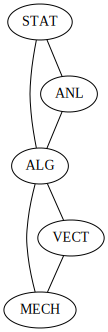

In [105]:
dg_dot = graphviz.Digraph(comment='disease-network')
for node in dg.nodes():
    dg_dot.node(node)

for edge in dg.edges():
    dg_dot.edge(edge[0],edge[1], dir='none')

dg_dot

In [106]:
# rm,_,_ = pybnl.bn.cpdag(bn)
# print(rm.dimnames[1])
# rm.rx(1,2)
pybnl.bn.cpdag(bn)
# for i in range(12):
#     print(rm.rx(i+1,1), rm.rx(i+1,2))

(['ALG', 'ANL', 'MECH', 'STAT', 'VECT'],
 set(),
 {('ALG', 'MECH'),
  ('ALG', 'VECT'),
  ('ANL', 'ALG'),
  ('STAT', 'ALG'),
  ('STAT', 'ANL'),
  ('VECT', 'MECH')})

In [107]:
pybnl.bn.dag(bn)

(['ALG', 'ANL', 'MECH', 'STAT', 'VECT'],
 [('ALG', 'MECH'),
  ('ALG', 'VECT'),
  ('ANL', 'ALG'),
  ('STAT', 'ALG'),
  ('STAT', 'ANL'),
  ('VECT', 'MECH')],
 [])

In [108]:
pybnl.bn.score(bn, bn.df)

-364.23134474940196

In [109]:
pybnl.bn.vstructs(bn)

     X     Z      Y     
[1,] "ANL" "ALG"  "STAT"
[2,] "ALG" "MECH" "VECT"



,X,Z,Y
0,ANL,ALG,STAT
1,ALG,MECH,VECT


In [110]:
tmp1 = bn.rfit
tmp2 = bn.rnet

In [111]:
%%R -i tmp1 -i tmp2
#print(tmp2)
names(tmp1)

[1] "ALG"  "ANL"  "MECH" "STAT" "VECT"


In [112]:
print(pybnl.bn.rfit2rnet(bn.rfit))


  Random/Generated Bayesian network

  model:
   [STAT][ANL|STAT][ALG|ANL:STAT][VECT|ALG][MECH|ALG:VECT] 
  nodes:                                 5 
  arcs:                                  6 
    undirected arcs:                     0 
    directed arcs:                       6 
  average markov blanket size:           2.40 
  average neighbourhood size:            2.40 
  average branching factor:              1.20 

  generation algorithm:                  Empty 




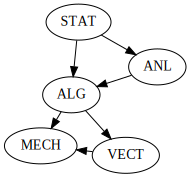

In [113]:
pybnl.bn.dot(*pybnl.bn.dag(bn))

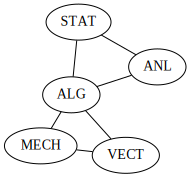

In [114]:
pybnl.bn.dot(*pybnl.bn.cpdag(bn))

In [115]:
print(pybnl.bn.drop_arc(bn.rnet, frm='STAT', to='ANL'))


  Random/Generated Bayesian network

  model:
   [ANL][STAT][ALG|ANL:STAT][VECT|ALG][MECH|ALG:VECT] 
  nodes:                                 5 
  arcs:                                  5 
    undirected arcs:                     0 
    directed arcs:                       5 
  average markov blanket size:           2.40 
  average neighbourhood size:            2.00 
  average branching factor:              1.00 

  generation algorithm:                  Empty 




In [116]:
pybnl.bn.rnet2cpdag(pybnl.bn.drop_arc(bn.rnet, frm='STAT', to='ANL'))

(['ALG', 'ANL', 'MECH', 'STAT', 'VECT'],
 {('ALG', 'MECH'), ('ALG', 'VECT'), ('ANL', 'ALG'), ('STAT', 'ALG')},
 {('VECT', 'MECH')})

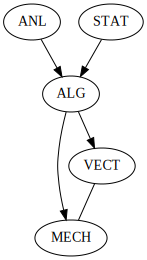

In [117]:
pybnl.bn.dot(*pybnl.bn.rnet2cpdag(pybnl.bn.drop_arc(bn.rnet, frm='STAT', to='ANL')),engine='dot')

In [118]:
tmp1 = bn.rfit
tmp2 = bn.rnet

In [119]:
%%R -i tmp1 -i tmp2
tmp2_da = drop.arc(tmp2, from="STAT", to="ANL")
# print(tmp2)
cpdag(tmp2_da)


  Random/Generated Bayesian network

  model:
    [partially directed graph]
  nodes:                                 5 
  arcs:                                  5 
    undirected arcs:                     1 
    directed arcs:                       4 
  average markov blanket size:           2.40 
  average neighbourhood size:            2.00 
  average branching factor:              0.80 

  generation algorithm:                  Empty 



In [120]:
%%R -o rdf_lt
data(learning.test)
rdf_lt = learning.test

* [mapping-categorical-data-in-pandas](http://benalexkeen.com/mapping-categorical-data-in-pandas/)
* [CategoricalDtype](https://pandas.pydata.org/pandas-docs/stable/categorical.html#categoricaldtype)

In [121]:
#df_lt = rpy2.robjects.pandas2ri.ri2py(rdf_lt)
df_lt = rdf_lt

ct1 = pd.api.types.CategoricalDtype(['a', 'b', 'c'], ordered=True)
ct2 = pd.api.types.CategoricalDtype(['a', 'b'], ordered=True)

for c in 'ABCDE':
    df_lt[c] = df_lt[c].astype(ct1)
df_lt['F'] = df_lt['F'].astype(ct2)

df_lt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1 to 5000
Data columns (total 6 columns):
A    5000 non-null category
B    5000 non-null category
C    5000 non-null category
D    5000 non-null category
E    5000 non-null category
F    5000 non-null category
dtypes: category(6)
memory usage: 69.0+ KB


* [Fundamentals of Structure Learning](http://www.bnlearn.com/about/teaching/slides-bnshort.pdf) p. 157
    * bnlearn implements several constraint-based algorithms, each with its own function: gs(), iamb(), mmpc(), si.hiton.pc(), etc.

In [122]:
%%R -o cpdaghiton
cpdaghiton = si.hiton.pc(rdf_lt, test = "mc-mi", undirected = FALSE)
cpdaghiton


  Bayesian network learned via Constraint-based methods

  model:
    [partially directed graph]
  nodes:                                 6 
  arcs:                                  5 
    undirected arcs:                     1 
    directed arcs:                       4 
  average markov blanket size:           2.33 
  average neighbourhood size:            1.67 
  average branching factor:              0.67 

  learning algorithm:                    Semi-Interleaved HITON-PC 
  conditional independence test:         Mutual Information (disc., MC) 
  alpha threshold:                       0.05 
  permutations:                          5000 
  tests used in the learning procedure:  34 
  optimized:                             FALSE 



[networks](http://www.bnlearn.com/documentation/networks/)
<img src='http://www.bnlearn.com/documentation/networks/learning.test.png' width=400>

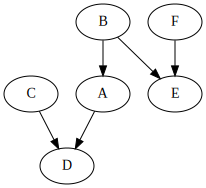

In [123]:
pybnl.bn.dot(*pybnl.bn.rnet2dag(cpdaghiton),engine='dot')

In [124]:
%%R -o daghc
daghc = hc(rdf_lt, score = "bic", iss=1, restart = 10, perturb = 5, start = random.graph(names(rdf_lt)))

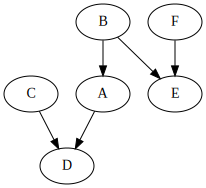

In [125]:
pybnl.bn.dot(*pybnl.bn.rnet2dag(daghc),engine='dot')

* [Fundamentals of Structure Learning](http://www.bnlearn.com/about/teaching/slides-bnshort.pdf) p. 203
    * bnlearn implements several constraint-based algorithms, each with its own function: gs(), iamb(), mmpc(), si.hiton.pc(), etc.

In [126]:
%%R -o dagrsmax2
dagrsmax2 = rsmax2(rdf_lt, 
                   restrict = "si.hiton.pc", restrict.args = list(test = "x2", alpha = 0.01), 
                   maximize = "tabu", maximize.args = list(score = "bic", tabu = 10))

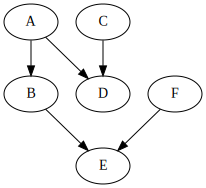

In [127]:
pybnl.bn.dot(*pybnl.bn.rnet2dag(dagrsmax2),engine='dot')

In [128]:
%%R -o dagmmhc
# dagmmhc = rsmax2(rdf_lt, restrict = "mmpc", maximize = "hc")
dagmmhc = mmhc(rdf_lt)

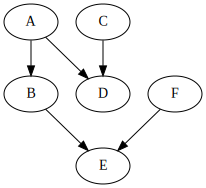

In [129]:
pybnl.bn.dot(*pybnl.bn.rnet2dag(dagmmhc),engine='dot')

Model comparison: DAGs as Multivariate Trinomials
[Fundamentals of Structure Learning](http://www.bnlearn.com/about/teaching/slides-bnshort.pdf) p. 214

In [130]:
# %%R
# bnlearn:::check.data(ldmarks, allow.levels = TRUE, allow.missing = TRUE, warn.if.no.missing = TRUE)#, 
# # ldmarks$LAT = as.numeric(ldmarks$LAT)

In [131]:
%%R
head(dmarks2)

     MECH    VECT       ALG       ANL    STAT
1 (46,77] (61,82] (59.6,80] (60.2,70] (44,81]
2 (46,77] (61,82] (59.6,80] (60.2,70] (44,81]
3 (46,77] (61,82] (59.6,80] (60.2,70] (44,81]
4 (46,77] (61,82] (59.6,80] (60.2,70] (44,81]
5 (46,77] (61,82] (59.6,80] (60.2,70] (44,81]
6 (46,77] (40,61] (59.6,80] (60.2,70] (44,81]


In [132]:
%%R
ldmarks = data.frame(dmarks2, LAT = factor(rep(NA, nrow(dmarks2)), levels = c("A", "B")))
head(ldmarks)

     MECH    VECT       ALG       ANL    STAT  LAT
1 (46,77] (61,82] (59.6,80] (60.2,70] (44,81] <NA>
2 (46,77] (61,82] (59.6,80] (60.2,70] (44,81] <NA>
3 (46,77] (61,82] (59.6,80] (60.2,70] (44,81] <NA>
4 (46,77] (61,82] (59.6,80] (60.2,70] (44,81] <NA>
5 (46,77] (61,82] (59.6,80] (60.2,70] (44,81] <NA>
6 (46,77] (40,61] (59.6,80] (60.2,70] (44,81] <NA>


In [133]:
%%R
imputed = ldmarks
imputed$LAT = sample(factor(c("A", "B")), nrow(dmarks2), replace = TRUE)
head(imputed)

     MECH    VECT       ALG       ANL    STAT LAT
1 (46,77] (61,82] (59.6,80] (60.2,70] (44,81]   B
2 (46,77] (61,82] (59.6,80] (60.2,70] (44,81]   A
3 (46,77] (61,82] (59.6,80] (60.2,70] (44,81]   A
4 (46,77] (61,82] (59.6,80] (60.2,70] (44,81]   B
5 (46,77] (61,82] (59.6,80] (60.2,70] (44,81]   A
6 (46,77] (40,61] (59.6,80] (60.2,70] (44,81]   B


In [134]:
%%R
head(ldmarks)

     MECH    VECT       ALG       ANL    STAT  LAT
1 (46,77] (61,82] (59.6,80] (60.2,70] (44,81] <NA>
2 (46,77] (61,82] (59.6,80] (60.2,70] (44,81] <NA>
3 (46,77] (61,82] (59.6,80] (60.2,70] (44,81] <NA>
4 (46,77] (61,82] (59.6,80] (60.2,70] (44,81] <NA>
5 (46,77] (61,82] (59.6,80] (60.2,70] (44,81] <NA>
6 (46,77] (40,61] (59.6,80] (60.2,70] (44,81] <NA>


In [135]:
%%R -o fitted
fitted = bn.fit(empty.graph(names(ldmarks)), imputed)
fitted$LAT = array(c(0.5, 0.5), dim = 2, dimnames = list(c("A", "B")))
# three iterations of structural EM.
for (i in 1:15) {
    # expectation step.
    imputed = impute(fitted, ldmarks, method = "bayes-lw")
    # maximisation step (forcing LAT to be connected to the other nodes).
    dag = hc(imputed, whitelist = data.frame(from = "LAT", to = names(dmarks2)))
    fitted.new = bn.fit(dag, imputed, method = "bayes")


    if (isTRUE(all.equal(fitted, fitted.new))) {
      print(c("i: ", i))
      break
    } else {
      fitted = fitted.new
    }
}#FOR
print(score(dag,data=imputed,type="bic"))
modelstring(fitted)

[1] "i: " "6"  
[1] -472.6769
[1] "[LAT][MECH|LAT][VECT|LAT][ALG|LAT][ANL|ALG:LAT][STAT|ALG:LAT]"


In [136]:
%%R
table(imputed$LAT)


 A  B 
62 26 


In [137]:
%%R
latent = factor(c(rep("A", 44), "B", rep("A", 7), rep("B", 36)))
print(table(latent))
# head(data.frame(dmarks2, LAT=latent))

latent
 A  B 
51 37 


In [138]:
%%R
list(latent, imputed$LAT)

[[1]]
 [1] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[39] A A A A A A B A A A A A A A B B B B B B B B B B B B B B B B B B B B B B B B
[77] B B B B B B B B B B B B
Levels: A B

[[2]]
 [1] B B B B B B B B A B B A A B A B A A A B A A B A A B A A A A A B A A A B B B
[39] B A B B A A A B B A B A B A A A A A A A A A A A A A A A A A A A A A A A A A
[77] A A A A A A A A A A A A
Levels: A B



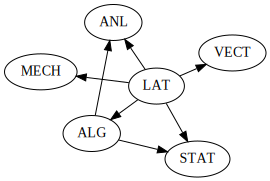

In [139]:
pybnl.bn.dot(*pybnl.bn.rnet2dag(pybnl.bn.rfit2rnet(fitted)))#,engine='dot'

In [163]:
%%R -o fitted
fitted = bn.fit(empty.graph(names(ldmarks)), imputed)
fitted$LAT = array(c(0.5, 0.5), dim = 2, dimnames = list(c("A", "B")))
# three iterations of structural EM.
for (i in 1:15) {
    # expectation step.
    imputed = impute(fitted, ldmarks, method = "bayes-lw")
    # maximisation step (forcing LAT to be connected to the other nodes).
    # dag = hc(imputed, whitelist = data.frame(from = "LAT", to = names(dmarks2)))
    dag = mmhc(imputed, whitelist = data.frame(from = "LAT", to = names(dmarks2)))
    fitted.new = bn.fit(dag, imputed, method = "bayes")


    if (isTRUE(all.equal(fitted, fitted.new))) {
      print(c("i: ", i))
      break
    } else {
      fitted = fitted.new
    }
}#FOR
print(score(dag,data=imputed,type="bic"))
modelstring(fitted)

[1] "i: " "5"  
[1] -442.0592
[1] "[LAT][MECH|LAT][VECT|LAT][ALG|LAT][ANL|LAT][STAT|LAT]"


In [164]:
%%R
table(imputed$LAT)


 A  B 
67 21 


In [165]:
%%R
print(table(latent))

latent
 A  B 
51 37 


In [166]:
%%R
list(latent, imputed$LAT)

[[1]]
 [1] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[39] A A A A A A B A A A A A A A B B B B B B B B B B B B B B B B B B B B B B B B
[77] B B B B B B B B B B B B
Levels: A B

[[2]]
 [1] B B B B B B B B B B B B B A B A A B B B B B B B A A A A A A A A A A A A A A
[39] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
[77] A A A A A A A A A A A A
Levels: A B



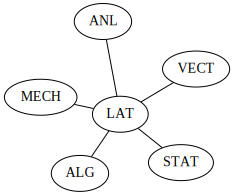

In [169]:
pybnl.bn.dot(*pybnl.bn.rnet2cpdag(pybnl.bn.rfit2rnet(fitted)))#,engine='dot'

In [145]:
# %%R
# # structural expectation-maximization.
# structural.em.2 = function(x, maximize = "hc", maximize.args = list(), fit = "mle", fit.args = list(), impute, impute.args = list(), return.all = FALSE, start = NULL, max.iter = 5, debug = FALSE) {

#   ntests = 0
#   print("###")

#   # check the data are there.
#   # data.info =  bnlearn:::check.data(x, allow.levels = TRUE, allow.missing = TRUE, warn.if.no.missing = TRUE, stop.if.all.missing = !is(start, "bn.fit"))
#   data.info =  bnlearn:::check.data(x, allow.levels = TRUE, allow.missing = TRUE, warn.if.no.missing = TRUE)
#   print(data.info)#$complete.nodes
#   print("###")

#   # check the max.iter parameter.
#   max.iter = bnlearn:::check.max.iter(max.iter)
#   print("###")
#   # check debug and return.data.
#   bnlearn:::check.logical(debug)
#   bnlearn:::check.logical(return.all)
#   print("###")

#   # check the arguments used for structure learning as in rsmax2().
#   bnlearn:::check.learning.algorithm(algorithm = maximize, class = "score")

#   print("###")
    
#   critical.arguments = c("x", "heuristic", "start", "debug")
#   bnlearn:::check.unused.args(intersect(critical.arguments, names(maximize.args)), character(0))
#   maximize.args[critical.arguments] = list(x = NULL, heuristic = maximize, start = NULL, debug = debug)

#   print("###")
    
#   # check the arguments used for parameter learning as in bn.cv().
#   bnlearn:::check.fitting.method(method = fit, data = x)
#   fit.args = bnlearn:::check.fitting.args(method = fit, network = NULL, data = x,  extra.args = fit.args)

#   print("###")
    
#   # check the arguments used for imputations.
#   impute = bnlearn:::check.imputation.method(impute, x)
#   impute.args = bnlearn:::check.imputation.extra.args(impute, impute.args)

#   # if there is no preseeded network, use an empty one.
#   print("###")
#   if (is.null(start)) {
#     print("is.null(start)")

#     dag = empty.graph(nodes = names(x))
#     fitted = bnlearn:::bn.fit.backend(dag, data = x, method = fit, extra.args = fit.args) # , data.info = data.info

#   }#THEN
#   else {
#     print("is.null(start): else")

#     print("---")
#     # check start's class.
#     bnlearn:::check.bn.or.fit(start)
#     print("---")
#     # check the preseeded network against the data set.
#     if (is(start, "bn")) {

#       print("--- is(start, bn)")
#       bnlearn:::check.bn.vs.data(start, x)
#       # check the preseeded network is valid for the model assumptions.
#       bnlearn:::check.arcs.against.assumptions(start$arcs, x, maximize.args$score)

#       dag = start
#       fitted = bnlearn:::bn.fit.backend(start, data = x, method = fit, extra.args = fit.args) # , data.info = data.info

#     }#THEN
#     else if (is(start, "bn.fit")) {
#       print("--- is(start, bn.fit)")

#       bnlearn:::check.fit.vs.data(start, x)
#       # fitted networks are necessarily valid for the model assumptions.

#       dag = bn.net(start)
#       fitted = start

#     }#THEN

#   }#ELSE

#   print("###.")
#   # initialize the algorithm.
#   if (debug) {

#     cat("* initializing the network to perform the first imputation.\n")
#     cat("* network structure:\n")
#     print(dag)
#     cat("* fitted parameters:\n")
#     print(fitted)

#   }#THEN

#   # from this point on the data are complete.
#   print(c("names(x) ", names(x)))
#   print(data.info)#$complete.nodes
#   print("###..")
#   #data.info$complete.nodes[names(x)] = TRUE

#   print("###...")
#   for (i in seq(max.iter)) {

#     if (debug) {

#       cat("----------------------------------------------------------------\n")
#       cat("* iteration", i, ", expectation step .\n")

#     }#THEN

#     # expectation step.
#     complete = bnlearn:::impute.backend(fitted = fitted, data = x, method = impute, extra.args = impute.args, debug = debug)

#     if (debug) {

#       cat("----------------------------------------------------------------\n")
#       cat("* iteration", i, ", maximization step .\n")

#     }#THEN

#     # maximization step, structure learning (starting from the previous network).
#     maximize.args$x = complete
#     maximize.args$start = dag
#     greedy.search.fn = get("greedy.search", asNamespace("bnlearn"))
#     dag = do.call(greedy.search.fn, maximize.args, quote=TRUE)

#     # maximization step, parameter learning.
#     fitted.new = bnlearn:::bn.fit.backend(dag, data = complete, method = fit, extra.args = fit.args) # , data.info = data.info

#     if (debug) {

#       cat("----------------------------------------------------------------\n")
#       cat("* fitted parameters:\n")
#       print(fitted)

#     }#THEN

#     # update the number of model comparisons.
#     ntests = ntests + dag$learning$ntests

#     # a rudimentary stopping rule (the fitted network must be the same as in
#     # the previous iteration).
#     if (isTRUE(all.equal(fitted, fitted.new)))
#       break
#     else
#       fitted = fitted.new

#   }#FOR

#   # set the metadata.
#   dag$learning$algo = "sem"
#   dag$learning$maximize = maximize
#   dag$learning$impute = impute
#   dag$learning$fit = fit
#   dag$learning$ntests = ntests

#   if (return.all)
#     invisible(list(dag = dag, imputed = complete, fitted = fitted))
#   else
#     invisible(dag)

# }#STRUCTURAL.EM

In [146]:
# %%R
# # ldmarks[1,"LAT"] = "A"
# # ldmarks[2,"LAT"] = "B"
# head(ldmarks)

In [147]:
# %%R
# imputed = ldmarks
# imputed$LAT = sample(factor(c("A", "B")), nrow(dmarks2), replace = TRUE)

# dag = empty.graph(nodes = names(ldmarks))
# fitted = bnlearn:::bn.fit.backend(dag, imputed)
# fitted$LAT = array(c(0.5, 0.5), dim = 2, dimnames = list(c("A", "B")))
# complete = impute.backend(fitted = fitted, data = x, method = impute, extra.args = impute.args, debug = debug)

* [bayesnetRtutorial](https://github.com/jacintoArias/bayesnetRtutorial/blob/master/index.Rmd) has a parametric em
* [bnlearn-error-in-structural-em](https://stackoverflow.com/questions/47970302/bnlearn-error-in-structural-em)

In [148]:
# %%R
# bnlearn:::check.data(ldmarks, allow.levels = TRUE, allow.missing = TRUE, warn.if.no.missing = TRUE, stop.if.all.missing = TRUE)#, 
# # ldmarks$LAT = as.numeric(ldmarks$LAT)

In [149]:
# %%R
# trace(structural.em, edit="emacs")
#trace(bnlearn:::check.data)

In [150]:
# %%R -o bn2
# # structural.em(x, maximize = "hc", maximize.args = list(), fit = "mle", fit.args = list(), impute, impute.args = list(), return.all = FALSE, start = NULL, max.iter = 5, debug = FALSE)
# # imputed2 = ldmarks
# # imputed2$LAT = sample(factor(c("A", "B")), nrow(dmarks2), replace = TRUE)
# # r = structural.em.2(ldmarks, fit = "bayes", impute="bayes-lw", start=fitted, return.all = TRUE)
# r = structural.em.2(ldmarks, fit = "bayes", impute="bayes-lw", return.all = TRUE)
# bn2 = r$dag
# print(modelstring(r$dag))

In [151]:
# %%R
# table(r$imputed$LAT)

In [152]:
# pybnl.bn.dot(*pybnl.bn.rnet2dag(bn2))#,engine='dot'

In [153]:
# %%R
# latent = factor(c(rep("A", 44), "B", rep("A", 7), rep("B", 36)))
# print(table(latent))
# head(data.frame(dmarks2, LAT=latent))

In [154]:
# %%R
# list(latent, r$imputed$LAT, imputed$LAT)